In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
df = pd.read_csv("student-por.csv")

In [5]:
df.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

school        1
sex           0
age           0
address       0
famsize       1
Pstatus       0
Medu          0
Fedu          0
Mjob          6
Fjob          1
reason        2
guardian      3
traveltime    0
studytime     0
failures      0
schoolsup     1
famsup        1
paid          1
activities    1
nursery       0
higher        2
internet      0
romantic      0
famrel        0
freetime      0
goout         1
Dalc          1
Walc          1
health        1
absences      2
G1            0
G2            0
G3            3
dtype: int64

In [7]:
df.isna().sum().sum() 

29

In [8]:
df.shape

(649, 33)

In [9]:
df.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel f

In [10]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      648 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     648 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        643 non-null    object 
 9   Fjob        648 non-null    object 
 10  reason      647 non-null    object 
 11  guardian    646 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   648 non-null    object 
 16  famsup      648 non-null    object 
 17  paid        648 non-null    object 
 18  activities  648 non-null    object 
 19  nursery     649 non-null    o

In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,648.000000,648.000000,648.000000,647.000000,649.000000,649.000000,646.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.185185,1.503086,2.279321,3.533951,3.644513,11.399076,11.570108,11.893189
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.176652,0.925338,1.285060,1.446230,4.625986,2.745265,2.913639,3.226737
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [16]:
df.fillna(df.mean, inplace=True)

In [17]:
df.isna().sum().sum()

0

In [20]:
before = type(df.G2[0])

In [22]:
df.G2 = df.G2.astype('int64')

In [23]:
after = type(df.G2[0])

In [24]:
before

float

In [25]:
after

numpy.int64

<AxesSubplot:>

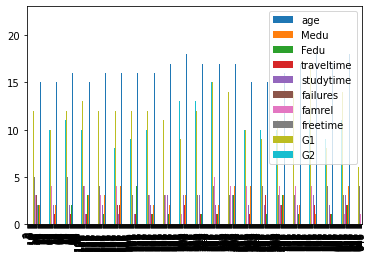

In [27]:
df.plot(kind ='bar')

In [28]:
normalized_df = (df-df.mean())/df.std() #using mean normalization

In [30]:
normalized_df.G2 = (df.G2-df.G2.min())/(df.G2.max() - df.G2.min()) #min max normalization applied on G2

In [31]:
normalized_df.G2

0      0.578947
1      0.578947
2      0.684211
3      0.736842
4      0.684211
         ...   
644    0.578947
645    0.789474
646    0.631579
647    0.526316
648    0.578947
Name: G2, Length: 649, dtype: float64

In [32]:
df.G2

0      11
1      11
2      13
3      14
4      13
       ..
644    11
645    15
646    12
647    10
648    11
Name: G2, Length: 649, dtype: int64

In [34]:
scaler = StandardScaler()

In [38]:
type(df.G3[0])

float

In [41]:
normalized_df.G1 = stats.zscore(df.G1)

In [42]:
normalized_df.G1

0     -4.155470
1     -0.874570
2      0.219064
3      0.948153
4     -0.145481
         ...   
644   -0.510025
645    1.312697
646   -0.145481
647   -0.510025
648   -0.510025
Name: G1, Length: 649, dtype: float64

In [43]:
df.G1

0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

In [44]:
bins = [0,7,12,15] #binning using cut
labels = ['C','B','A']
normalized_df.G2 = pd.cut(x = df.G2,bins = bins, labels = labels , include_lowest=True)

In [45]:
normalized_df.G2

0      B
1      B
2      A
3      A
4      A
      ..
644    B
645    A
646    B
647    B
648    B
Name: G2, Length: 649, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [47]:
normalized_df.G2.value_counts()

B    384
A    172
C     33
Name: G2, dtype: int64

In [48]:
normalized_df.G2 , cut_bin= pd.qcut(df.G2 , q = 3, labels = labels , retbins = True)

In [49]:
normalized_df.G2.value_counts()

B    269
C    228
A    152
Name: G2, dtype: int64

In [50]:
print(cut_bin)

[ 0. 10. 13. 19.]


In [51]:
static = pd.get_dummies(df.Mjob,prefix_sep="_",prefix = "Mjob")

In [52]:
static

,Mjob_<bound method NDFrame._add_numeric_operations.<locals>.mean of school sex age address famsize Pstatus Medu Fedu Mjob Fjob \\n0 GP F 18 U GT3 A 4 4 at_home teacher \n1 GP F 17 U GT3 T 1 1 at_home other \n2 GP F 15 U LE3 T 1 1 at_home other \n3 GP F 15 U GT3 T 4 2 health services \n4 GP F 16 U GT3 T 3 3 other other \n.. ... .. ... ... ... ... ... ... ... ... \n644 MS F 19 R GT3 T 2 3 services other \n645 MS F 18 U LE3 T 3 1 teacher services \n646 MS F 18 U GT3 T 1 1 other other \n647 MS M 17 U LE3 T 3 1 services services \n648 MS M 18 R LE3 T 3 2 services other \n\n ... famrel freetime goout Dalc Walc health absences G1 G2 G3 \n0 ... 4 3 4.0 1.0 1.0 3.0 4.0 0 11 11.0 \n1 ... 5 3 3.0 1.0 1.0 3.0 2.0 9 11 11.0 \n2 ... 4 3 2.0 2.0 3.0 3.0 6.0 12 13 12.0 \n3 ... 3 2 2.0 1.0 1.0 5.0 0.0 14 14 14.0 \n4 ... 4 3 2.0 1.0 2.0 5.0 0.0 11 13 13.0 \n.. ... ... ... ... ... ... ... ... .. .. ... \n644 ... 5 4 2.0 1.0 2.0 5.0 4.0 10 11 10.0 \n645 ... 4 3 4.0 1.0 1.0 1.0 4.0 15 15 16.0 \n646 ... 1 1 1.0 1.0 1.0 5.0 6.0 11 12 9.0 \n647 ... 2 4 5.0 3.0 4.0 2.0 6.0 10 10 10.0 \n648 ... 4 4 1.0 3.0 4.0 5.0 4.0 10 11 11.0 \n\n[649 rows x 33 columns]>,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
644,0,0,0,0,1,0
645,0,0,0,0,0,1
646,0,0,0,1,0,0
647,0,0,0,0,1,0
